In [6]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 6335/6335 [10:41<00:00,  9.88it/s]


(6335, 4)


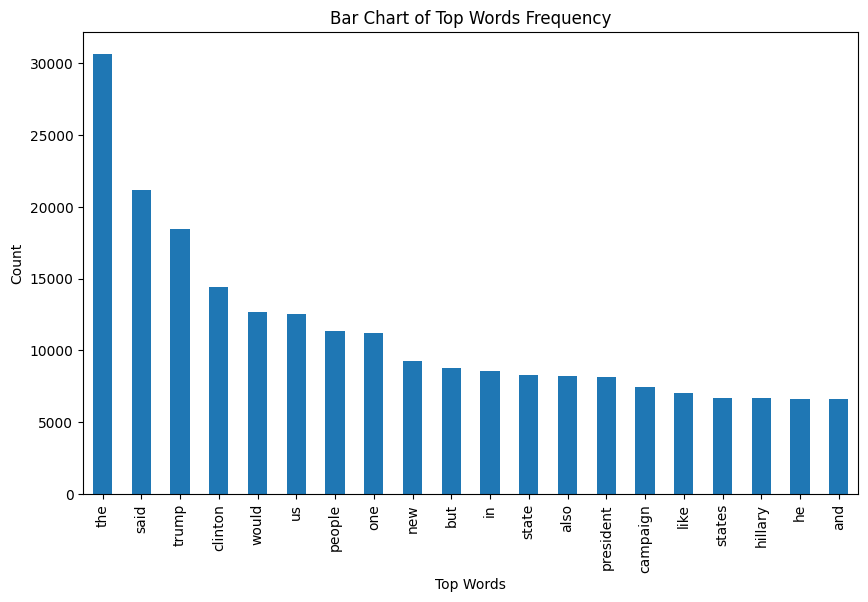

In [12]:
# Загрузим все необходимые библиотеки
import os
import numpy as np
import pandas as pd

import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


#!wget https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv

df = pd.read_csv("./fake_news.csv") # wget скачал в рабочую директорию файл с датасетом и мы его уже можем использовать
df.isnull().sum()

from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

preprocessed_review = preprocess_text(df['text'].values)
df['text'] = preprocessed_review

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

print(df.shape)


0.9606398652915176
0.9122474747474747
Accuracy: 94.07%
Accuracy Score of Passive Aggresive Scassifier: 94.07%


array([[749,  44],
       [ 50, 741]])

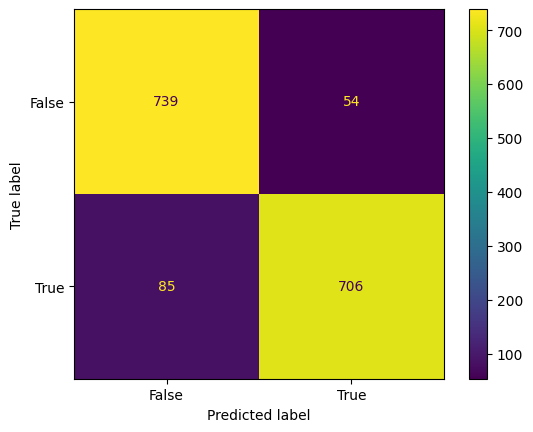

In [21]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

x_train, x_test, y_train, y_test = train_test_split(df['text'],
                                                    df['label'],
                                                    test_size=0.25)



vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)


from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

#testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

#Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])


cm_display.plot()




labels = df.label



from sklearn.linear_model import PassiveAggressiveClassifier
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score of Passive Aggresive Scassifier: {round(accuracy*100,2)}%')


confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

Как мы можем видеть, использование LogisticRegression даёт 706 и 739 правильных ответов, 54 и 85 ошибочных, точность 91%. Использование же Passive Aggresive Scassifier приводит к значительному повышению точности, 741 и 749 правильных ответов, 44 и 50 ошибочных, точность 94%. Что на 3 процента выше.